<a href="https://colab.research.google.com/github/adtitovich/dsml-17/blob/main/m8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

#Этапы работы:
**1. Получите данные и загрузите их в рабочую среду.**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/adtitovich/dsml-17/main/datasets/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**2. Проведите первичный анализ.   
а) Проверьте количество записей для каждого класса. Сделайте вывод.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# Проверим количество записей для каждого класса Type.

# кол-во значений 
counts = data['Type'].value_counts()

# процентное соотношение 
percs = data['Type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# объединим
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
2,76,35.5%
1,70,32.7%
7,29,13.6%
3,17,7.9%
5,13,6.1%
6,9,4.2%


**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**


In [5]:
X = data.drop(columns = ['Type'])
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.**

In [6]:
# RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=32, class_weight='balanced')
clf_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=32)

**5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).**

In [7]:
clf_rf.score(X_test, y_test)

0.813953488372093

**6. Обработайте выбросы в данных.   
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?**

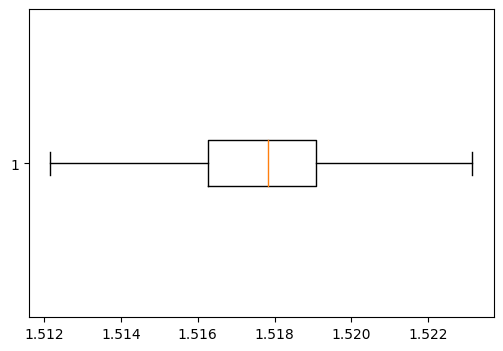

In [8]:


# RI
red_square = dict(markerfacecolor='r', marker='s') # выделим предполагаемые выбросы
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['RI'], vert=False, flierprops=red_square)
plt.show()

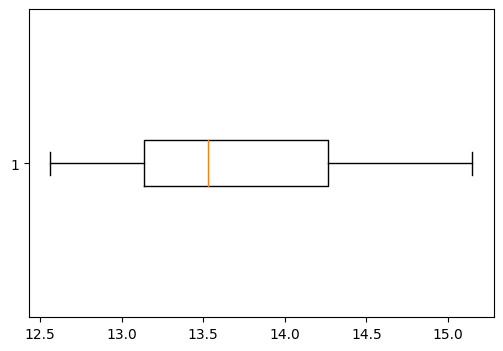

In [9]:
 # Na
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Na'], vert=False, flierprops=red_square)
plt.show()

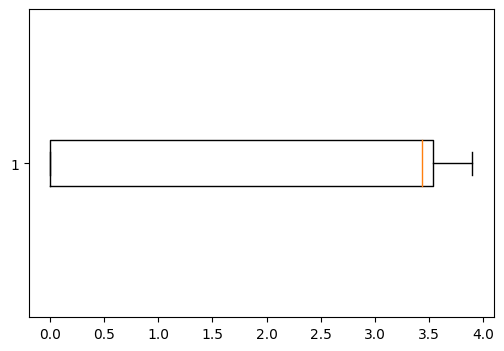

In [10]:
 # Mg
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Mg'], vert=False, flierprops=red_square)
plt.show()


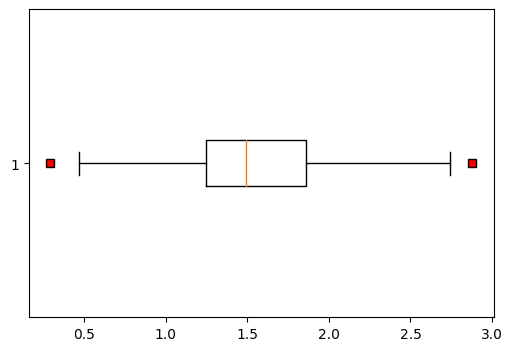

In [11]:
 # Al
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Al'], vert=False, flierprops=red_square)
plt.show()

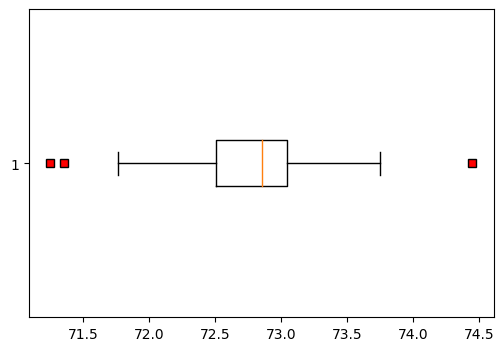

In [12]:
 # Si
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Si'], vert=False, flierprops=red_square)
plt.show()

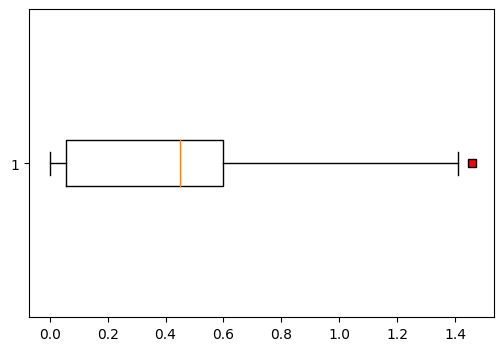

In [13]:
# K
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['K'], vert=False, flierprops=red_square)
plt.show()

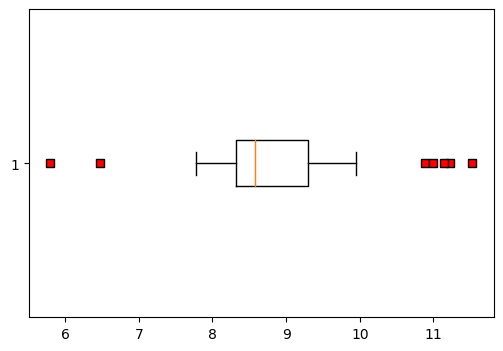

In [14]:
# Ca
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Ca'], vert=False, flierprops=red_square)
plt.show()

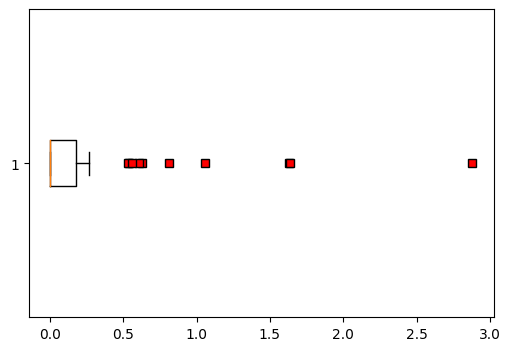

In [15]:
# Ba
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Ba'], vert=False, flierprops=red_square)
plt.show()

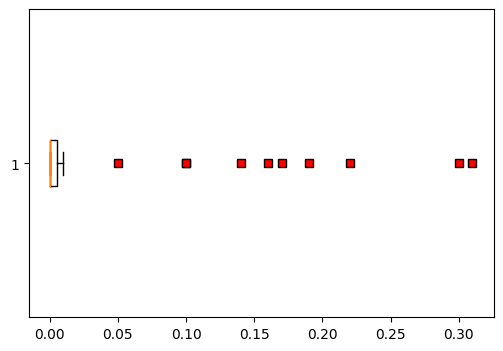

In [16]:
# Fe
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(X_test['Fe'], vert=False, flierprops=red_square)
plt.show()

**b) Исследуйте признаки на выбросы несколькими способами.**   


In [32]:
# оставим признаки,  в которых мы визуально определили выбросы

X_wout = X_test[['Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=4)
pr = clf.fit_predict(X_wout)
np.array(np.unique(pr, return_counts=True)).T

array([[-1,  4],
       [ 1, 39]])

In [31]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=2, min_samples=4).fit(X_wout)
pr = clustering.labels_

np.array(np.unique(pr, return_counts=True)).T

array([[-1,  2],
       [ 0, 41]])

**c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.**

**7. Повторите п. 4, п. 5.**

**8. Сформулируйте выводы по проделанной работе.   
а) Кратко опишите, какие преобразования были сделаны с данными.   
b) Сравните точность двух моделей.   
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.**